In [108]:
!pip install librosa
!pip install soundfile
!pip install resampy


In [109]:
import librosa
import numpy as np
def extract_mfcc(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T,axis=0)
     
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs_processed

In [110]:
import soundfile as sf
from pydub import AudioSegment

def extract_mfcc(file_name):
    # Convert m4a file to wav            
    audio = AudioSegment.from_file(file_name)
    audio.export("temp.wav", format="wav")
    data, samplerate = sf.read("temp.wav")
    
    mfccs = librosa.feature.mfcc(y=data, sr=samplerate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    
    return mfccs_processed


In [49]:
import os
import fnmatch
import librosa

# Specify the directory you want to scan for .wav files
directory = 'F:\speech_sri'

# Use os.walk to scan through directory recursively and fnmatch to filter .wav files
wav_files = [os.path.join(root, file)
             for root, dirs, files in os.walk(directory)
             for file in fnmatch.filter(files, '*.wav')]

# Now 'wav_files' contains a list of paths to all .wav files in the directory
# You can then extract MFCCs for each audio file
features = []
for file in wav_files:
    mfccs = extract_mfcc(file)
    features.append(mfccs)


In [111]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [53]:
import os
import fnmatch
import numpy as np
import librosa
import torch # import PyTorch



directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature'  # replace with your output directory

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

wav_files = [os.path.join(root, file)
             for root, dirs, files in os.walk(directory)
             for file in fnmatch.filter(files, '*.m4a')]

for file in wav_files:
    mfccs = extract_mfcc(file)
    
    # Convert array to torch tensor
    mfccs = torch.tensor(mfccs)

    # Construct output file name by replacing .wav with .pt and changing the directory
    output_file = os.path.join(output_directory, os.path.basename(file).replace('.m4a', '.pt'))
    
    # Save to a PyTorch file (.pt)
    torch.save(mfccs, output_file)

In [46]:
import os
import fnmatch
import numpy as np
import librosa
import torch  # import PyTorch

def extract_mfcc(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T,axis=0)
     
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs_processed

directory = 'F:\\speech_sri'
output_directory = 'F:\\sppech_sri_save_feature'  # replace with your output directory

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

wav_files = [os.path.join(root, file)
             for root, dirs, files in os.walk(directory)
             for file in fnmatch.filter(files, '*.wav')]

# Sort the files to make sure they're processed in a consistent order
wav_files.sort()

for i, file in enumerate(wav_files):
    mfccs = extract_mfcc(file)
    
    # If no mfcc could be extracted, skip this file
    if mfccs is None:
        continue

    # Convert array to torch tensor
    mfccs = torch.from_numpy(mfccs)

    # Construct output file name by using the loop counter
    output_file = os.path.join(output_directory, f'{i}.pt')
    
    # Save to a PyTorch file (.pt)
    torch.save(mfccs, output_file)


In [16]:
import torch
x = torch.tensor([1, 2, 3, 4])
torch.save(x, 'F:\\sppech_sri_save_feature\\test.pt')


In [ ]:
import os
import fnmatch
import numpy as np
import librosa
import torch

def extract_mfcc(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed

directory = 'F:\\speech_sri'
output_directory = 'F:\\sppech_sri_save_feature'

os.makedirs(output_directory, exist_ok=True)

wav_files = [os.path.join(root, file)
             for root, dirs, files in os.walk(directory)
             for file in fnmatch.filter(files, '*.wav')]

wav_files.sort()

for i, file in enumerate(wav_files):
    mfccs = extract_mfcc(file)
    mfccs = torch.from_numpy(mfccs)
    output_file = os.path.join(output_directory, f'{i}.pt')
    torch.save(mfccs, output_file)
    print(f'Saved {output_file}')  # print a message each time a file is saved


In [39]:
pip install resampy


                                              0.0/3.1 MB ? eta -:--:--
                                              0.1/3.1 MB 2.0 MB/s eta 0:00:02
     --                                       0.2/3.1 MB 2.5 MB/s eta 0:00:02
     -----                                    0.4/3.1 MB 3.2 MB/s eta 0:00:01
     ---------                                0.7/3.1 MB 3.3 MB/s eta 0:00:01
     -----------                              0.9/3.1 MB 3.6 MB/s eta 0:00:01
     ---------------                          1.2/3.1 MB 3.9 MB/s eta 0:00:01
     -------------------                      1.5/3.1 MB 4.2 MB/s eta 0:00:01
     -----------------------                  1.8/3.1 MB 4.4 MB/s eta 0:00:01
     ----------------------------             2.2/3.1 MB 4.7 MB/s eta 0:00:01
     ---------------------------------        2.6/3.1 MB 4.9 MB/s eta 0:00:01
     -------------------------------------    2.9/3.1 MB 4.8 MB/s eta 0:00:01
     ---------------------------------------- 3.1/3.1 MB 4.8 MB/s eta 0

In [41]:
import os
import fnmatch
import numpy as np
import librosa
import torch

def extract_mfcc(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed

directory = r'F:/speech_sri'
output_directory = r'F:/sppech_sri_save_feature'

os.makedirs(output_directory, exist_ok=True)

wav_files = [os.path.join(root, file)
             for root, dirs, files in os.walk(directory)
             for file in fnmatch.filter(files, '*.M4A')]
print(wav_files)
wav_files.sort()

for i, file in enumerate(wav_files):
    mfccs = extract_mfcc(file)
    mfccs = torch.from_numpy(mfccs).float()
    test_file = wav_files[0]  # replace with the path to a real file
    mfccs = extract_mfcc(test_file)
    print(mfccs)

    output_file = os.path.join(output_directory, f'{i}.pt')
    torch.save(mfccs, output_file)
    print(f'Saved {output_file}')  # print a message each time a file is saved


['F:/speech_sri\\0.m4a', 'F:/speech_sri\\1.m4a', 'F:/speech_sri\\10.m4a', 'F:/speech_sri\\11.m4a', 'F:/speech_sri\\12.m4a', 'F:/speech_sri\\13.m4a', 'F:/speech_sri\\14.m4a', 'F:/speech_sri\\15.m4a', 'F:/speech_sri\\16.m4a', 'F:/speech_sri\\17.m4a', 'F:/speech_sri\\18.m4a', 'F:/speech_sri\\19.m4a', 'F:/speech_sri\\2.m4a', 'F:/speech_sri\\20.m4a', 'F:/speech_sri\\21.m4a', 'F:/speech_sri\\3.m4a', 'F:/speech_sri\\4.m4a', 'F:/speech_sri\\5.m4a', 'F:/speech_sri\\6.m4a', 'F:/speech_sri\\7.m4a', 'F:/speech_sri\\8.m4a', 'F:/speech_sri\\9.m4a']


C:\Users\Dell\AppData\Local\Temp\ipykernel_7444\3031524683.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')


ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\audio.py, line 32, in <module>

----> resampy = lazy.load("resampy")

In [88]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature' 

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Split data into train and test sets
# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(len(data))
print(len(labels))

# Initialize Logistic Regression model
model = LogisticRegression(solver='liblinear')


# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Print performance metrics
print(classification_report(y_test, y_pred))


22
22
22
22
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [89]:
# check lengths of data and labels arrays
print("Length of data:", len(data))
print("Length of labels:", len(labels))

# check the first few elements of data and labels arrays
print("First few elements of data:", data[:5])
print("First few elements of labels:", labels[:5])


Length of data: 22
Length of labels: 22
First few elements of data: [[-2.25654576e+02  5.31714955e+01 -2.91425463e+00  3.32215986e+01
  -2.41449121e+01 -8.74341867e+00 -7.51310890e+00  9.41452817e-01
  -6.07942693e+00 -1.04623878e+01  2.29106595e+00 -1.43167699e+01
   2.46616196e+00 -1.11933808e+01 -9.86868231e+00 -1.80073492e+00
  -8.93896201e+00  3.30574989e+00  2.66274116e+00  7.64546238e-01
   4.68338516e+00  4.64769759e+00  4.51566020e+00  2.14546597e+00
  -1.04918896e+00 -6.83303378e-01 -3.09042041e+00 -1.20292467e+00
  -4.95356698e+00  1.01252781e+00 -2.54998605e+00 -3.72217180e-01
  -1.74446629e+00 -8.71469136e-01 -2.71722316e-01 -2.74216216e-01
  -8.04756361e-01  4.01193251e-01 -1.81293477e-02 -4.43562422e-01]
 [-2.70356371e+02  7.28004284e+01 -2.15111813e+01 -5.86425036e-01
  -3.16445514e+01 -1.74977768e+01 -2.84607473e+01  1.29749170e+00
  -1.48516352e+01 -4.58963415e+00 -1.23317611e+01 -1.21544431e+01
  -6.02529528e+00 -1.19025809e+01 -8.04729029e+00 -8.87873399e+00
  -1.11

In [92]:
import os
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from tqdm import tqdm

directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature' 

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Rest of your code goes here ...



class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

epochs = 200_000
learning_rate = 0.01
input_dim = X_train.shape[1]  # set input_dim based on actual data
output_dim = 1

model = LogisticRegression(input_dim,output_dim)


criterion = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train).view(-1, 1),torch.Tensor(y_test).view(-1, 1)

losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(outputs, labels) # [200,1] -squeeze-> [200]
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%10000==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test.squeeze())
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.squeeze().detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")




Training Epochs:   5%|▌         | 10411/200000 [00:02<00:55, 3390.72it/s]

Iteration: 10000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  10%|█         | 20290/200000 [00:05<01:06, 2699.86it/s]

Iteration: 20000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  15%|█▌        | 30368/200000 [00:09<00:53, 3188.57it/s]

Iteration: 30000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  20%|██        | 40703/200000 [00:12<00:44, 3614.89it/s]

Iteration: 40000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  25%|██▌       | 50646/200000 [00:15<00:40, 3652.24it/s]

Iteration: 50000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  30%|███       | 60539/200000 [00:17<00:37, 3673.89it/s]

Iteration: 60000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  35%|███▌      | 70578/200000 [00:20<00:35, 3684.03it/s]

Iteration: 70000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  40%|████      | 80718/200000 [00:23<00:31, 3766.72it/s]

Iteration: 80000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  45%|████▌     | 90457/200000 [00:26<00:29, 3701.54it/s]

Iteration: 90000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  50%|█████     | 100658/200000 [00:28<00:26, 3722.93it/s]

Iteration: 100000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  55%|█████▌    | 110475/200000 [00:31<00:23, 3749.58it/s]

Iteration: 110000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  60%|██████    | 120690/200000 [00:34<00:20, 3779.57it/s]

Iteration: 120000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  65%|██████▌   | 130513/200000 [00:37<00:18, 3777.64it/s]

Iteration: 130000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  70%|███████   | 140329/200000 [00:39<00:16, 3588.10it/s]

Iteration: 140000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  75%|███████▌  | 150414/200000 [00:43<00:13, 3600.82it/s]

Iteration: 150000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  80%|████████  | 160497/200000 [00:46<00:13, 2869.51it/s]

Iteration: 160000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  85%|████████▌ | 170658/200000 [00:49<00:08, 3518.22it/s]

Iteration: 170000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  90%|█████████ | 180439/200000 [00:52<00:05, 3625.28it/s]

Iteration: 180000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs:  95%|█████████▌| 190537/200000 [00:55<00:02, 3656.25it/s]

Iteration: 190000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



Training Epochs: 100%|██████████| 200000/200000 [00:58<00:00, 3445.80it/s]

Iteration: 200000. 
Test - Loss: 40.0. Accuracy: 60.0
Train -  Loss: 52.94117736816406. Accuracy: 800.0



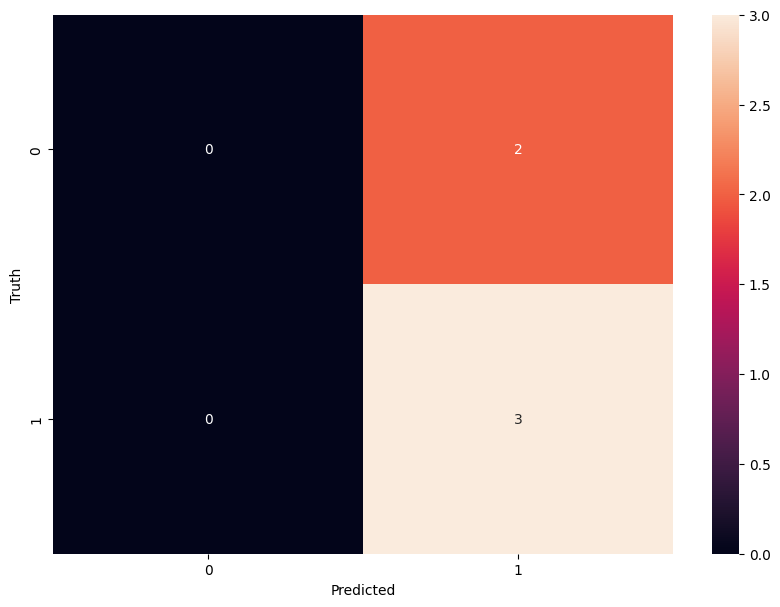

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test and y_pred to numpy arrays for easier manipulation
y_test_np = y_test.numpy().squeeze()
y_pred_np = model(X_test).round().detach().numpy()

# Compute confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np)

# Create heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


In [63]:
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy}")

0.6


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# suppose X_train is your 2D training data and y_train are the labels
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: X has 2 features, but LogisticRegression is expecting 40 features as input.

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7444\952439269.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


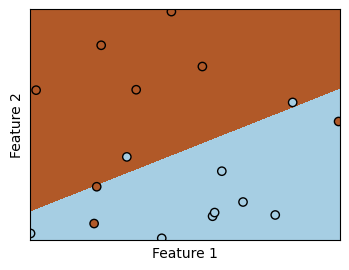

In [95]:
from sklearn.decomposition import PCA

# Perform PCA on the dataset
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train a new model on the reduced dataset
model_pca = LogisticRegression(solver='liblinear')
model_pca.fit(X_train_pca, y_train)

# Now the rest of the code for plotting should work
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [96]:
import torch
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import classification_report


directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature' 

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Split data into train and test sets
# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(len(data))
print(len(labels))

# Initialize Logistic Regression model
model = svm.SVC(kernel='linear')  # linear kernel

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Print performance metrics
print(classification_report(y_test, y_pred))






22
22
22
22
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [101]:
import torch
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import classification_report


directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature' 

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Split data into train and test sets
# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(len(data))
print(len(labels))

# Initialize Logistic Regression model
model = svm.SVC(kernel='poly')  # linear kernel

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Print performance metrics
print(classification_report(y_test, y_pred))

22
22
22
22
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [102]:
def augment_data(mfcc, n_augmentations=5):
    augmented = [mfcc]
    
    for _ in range(n_augmentations):
        # Time stretch (0.9x to 1.1x original speed)
        mfcc_stretch = librosa.feature.delta(mfcc, width=np.random.uniform(0.9, 1.1), order=1)
        
        # Pitch shift (+/- 2 half-steps)
        mfcc_shift = librosa.effects.pitch_shift(mfcc.T, sr, n_steps=np.random.randint(-2, 2)).T

        augmented.extend([mfcc_stretch, mfcc_shift])

    return augmented


In [104]:


directory = 'F:\speech_sri'
output_directory = 'F:\speech_data_sri' 




In [114]:
import librosa
import numpy as np
import soundfile as sf

# Load and augment audio file
def load_and_augment(file_path, n_augmentations=5):
    # Load original audio file
    y, sr = librosa.load(file_path)
    augmented = [y]
    
    for _ in range(n_augmentations):
        # Time stretch (0.9x to 1.1x original speed)
        y_stretch = librosa.effects.time_stretch(y, rate=np.random.uniform(0.9, 1.1))
        
        # Pitch shift (+/- 2 half-steps)
        y_shift = librosa.effects.pitch_shift(y, sr, n_steps=np.random.randint(-2, 2))
        
        augmented.extend([y_stretch, y_shift])
    
    return augmented, sr

# Use this function to save each augmented signal to a file and extract its MFCC features
def save_and_extract_features(augmented_signals, sr, file, output_directory):
    for i, y in enumerate(augmented_signals):
        # Save augmented signal to a temporary file
        tmp_file = 'tmp.wav'
        sf.write(tmp_file, y, sr)
        
        # Extract MFCC features from the augmented signal
        mfccs = extract_mfcc(tmp_file)

        # Convert array to torch tensor
        mfccs = torch.tensor(mfccs)

        # Construct output file name by replacing .m4a with .pt and changing the directory
        output_file = os.path.join(output_directory, f'{os.path.basename(file).replace(".m4a", "")}_{i}.pt')

        # Save to a PyTorch file (.pt)
        torch.save(mfccs, output_file)

# Now replace your main loop with this:
for file in wav_files:
    augmented_signals, sr = load_and_augment(file)
    save_and_extract_features(augmented_signals, sr, file, output_directory)



C:\Users\Dell\AppData\Local\Temp\ipykernel_7444\4225538918.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)


TypeError: pitch_shift() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

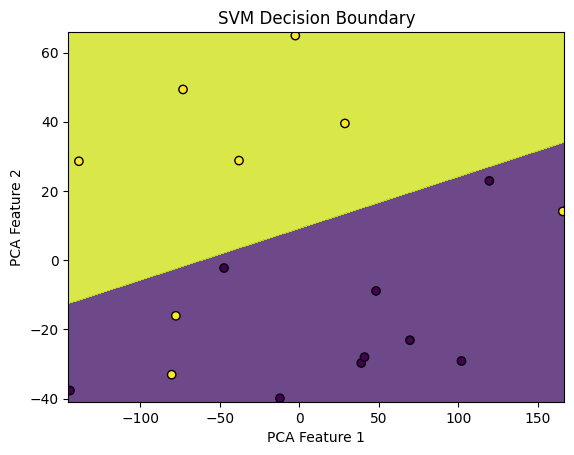

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
pca.fit(X_train)

# Transform both the training data and the grid points
X_train_2d = pca.transform(X_train)
X_test_2d = pca.transform(X_test)

# Fit the SVM model to the transformed training data
model_2d = svm.SVC(kernel='linear')
model_2d.fit(X_train_2d, y_train)

# Create a mesh grid for the decision boundary plot
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Predict for each point in the mesh grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)

# Also plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


In [116]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature' 

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

22
22


In [117]:
import numpy as np
import torch
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature'

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Initialize 10-Fold cross validation
kf = KFold(n_splits=10)

# Initialize SVM model
model = svm.SVC(kernel='linear')  # linear kernel

# Perform cross-validation
for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Print performance metrics
    print(classification_report(y_test, y_pred))


22
22
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

              precision    recall  f1-score   support

           1

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [118]:
import numpy as np
import torch
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature'

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Initialize 10-Fold cross validation
skf = StratifiedKFold(n_splits=10)

# Initialize SVM model
model = svm.SVC(kernel='linear')  # linear kernel

# Perform cross-validation
accuracies = []
for train_index, test_index in skf.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Print performance metrics
    print(classification_report(y_test, y_pred))
    
    # Compute accuracy and add it to the list
    accuracies.append(accuracy_score(y_test, y_pred))

# Compute and print the average accuracy
print('Average accuracy:', np.mean(accuracies))


22
22
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

             

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [119]:
import numpy as np
import torch
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature'

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Initialize 10-Fold cross validation
skf = StratifiedKFold(n_splits=3)

# Initialize SVM model
model = svm.SVC(kernel='linear')  # linear kernel

# Perform cross-validation
accuracies = []
for train_index, test_index in skf.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Print performance metrics
    print(classification_report(y_test, y_pred))
    
    # Compute accuracy and add it to the list
    accuracies.append(accuracy_score(y_test, y_pred))

# Compute and print the average accuracy
print('Average accuracy:', np.mean(accuracies))


22
22
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.67      0.50      0.57         4

    accuracy                           0.57         7
   macro avg       0.58      0.58      0.57         7
weighted avg       0.60      0.57      0.57         7

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

Average accur

In [120]:
import numpy as np
import torch
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature'

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)
    directory = 'F:\speech_sri'

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Initialize 10-Fold cross validation
skf = StratifiedKFold(n_splits=5)

# Initialize SVM model
model = svm.SVC(kernel='linear')  # linear kernel

# Perform cross-validation
accuracies = []
for train_index, test_index in skf.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Print performance metrics
    print(classification_report(y_test, y_pred))
    
    # Compute accuracy and add it to the list
    accuracies.append(accuracy_score(y_test, y_pred))

# Compute and print the average accuracy
print('Average accuracy:', np.mean(accuracies))


22
22
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4

             

In [121]:
import numpy as np
import torch
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature'

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Initialize 10-Fold cross validation
skf = StratifiedKFold(n_splits=2)

# Initialize SVM model
model = svm.SVC(kernel='linear')  # linear kernel

# Perform cross-validation
accuracies = []
for train_index, test_index in skf.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Print performance metrics
    print(classification_report(y_test, y_pred))
    
    # Compute accuracy and add it to the list
    accuracies.append(accuracy_score(y_test, y_pred))

# Compute and print the average accuracy
print('Average accuracy:', np.mean(accuracies))


22
22
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.80      0.80      0.80         5

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11

Average accuracy: 0.7727272727272727


In [122]:
import numpy as np
import torch
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

directory = 'F:\speech_sri'
output_directory = 'F:\sppech_sri_save_feature'

# Initialize data and labels list
data = []
labels = []

# Load extracted features
for i in range(22):
    feature = torch.load(os.path.join(output_directory, f'{i}.pt'))
    data.append(feature.numpy())  # Convert tensor to numpy array for sklearn
    # Assign labels: first 11 files are female, next 11 files are male
    labels.append(1 if i < 11 else 0)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))

# Ensure the number of samples are consistent between `data` and `labels`
assert len(data) == len(labels), "Mismatched sample sizes: {} vs {}".format(len(data), len(labels))

# Initialize 10-Fold cross validation
skf = StratifiedKFold(n_splits=4)

# Initialize SVM model
model = svm.SVC(kernel='linear')  # linear kernel

# Perform cross-validation
accuracies = []
for train_index, test_index in skf.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Print performance metrics
    print(classification_report(y_test, y_pred))
    
    # Compute accuracy and add it to the list
    accuracies.append(accuracy_score(y_test, y_pred))

# Compute and print the average accuracy
print('Average accuracy:', np.mean(accuracies))


22
22
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

             

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft
import subprocess

# Convert m4a to WAV
input_file = 'F:\machine'
output_file = 'converted_audio.wav'
subprocess.call(['ffmpeg', '-i', input_file, output_file])

# Load the converted audio file
sample_rate, data = wavfile.read(output_file)

# Compute the Fourier Transform
fft = np.fft.fft(data)

# Compute the STFT
frequencies, times, spectrogram = stft(data, sample_rate)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(data)) / float(sample_rate), data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

# Plot the Fourier Transform
plt.figure(figsize=(10, 4))
plt.plot(np.abs(fft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform')
plt.show()

# Plot the STFT
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, np.abs(spectrogram), shading='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform')
plt.show()

plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

# Plot the Fourier Transform
plt.figure(figsize=(10, 4))
plt.plot(np.abs(fft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform')
plt.show()

# Plot the STFT
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, np.abs(spectrogram), shading='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform')
plt.show()


ValueError: File format b'' not understood. Only 'RIFF' and 'RIFX' supported.

In [128]:
import librosa

# load the example clip
y, sr = librosa.load('0.wav')

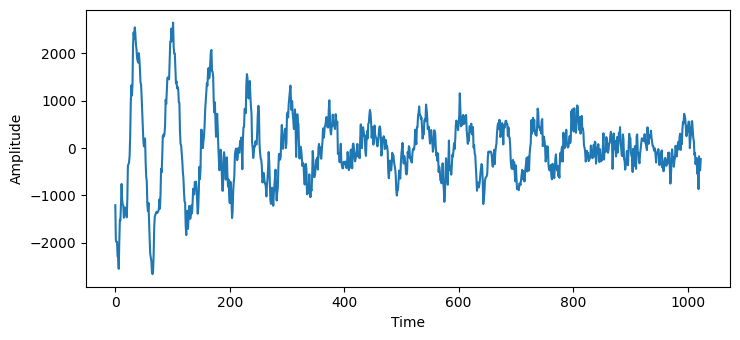

In [135]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
input_data = read("0.wav")
audio = input_data[1]
plt.plot(audio[0:1024])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

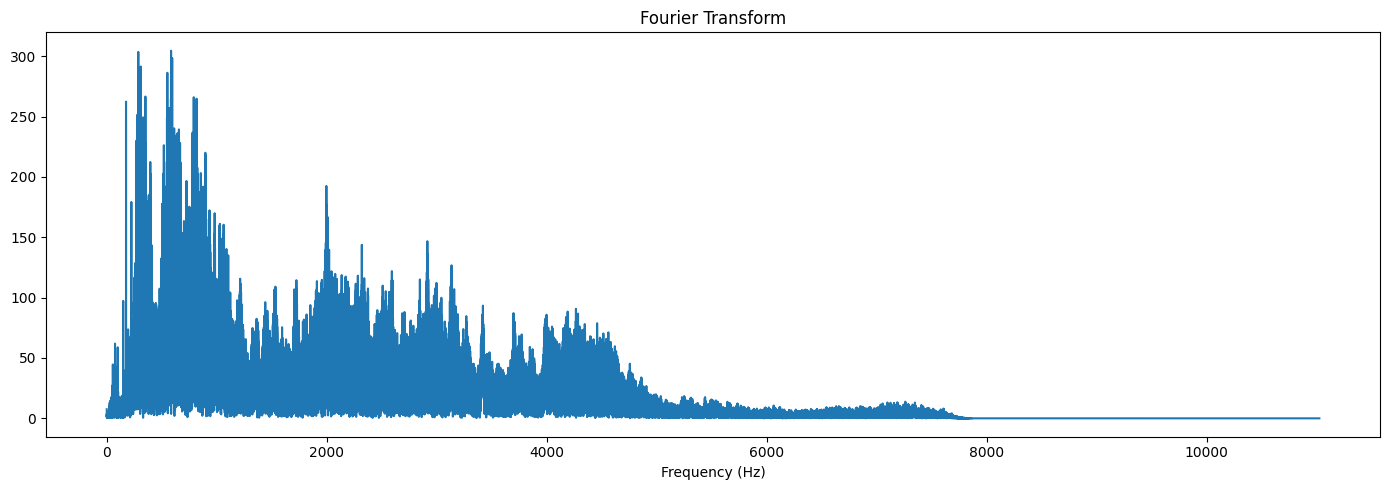

In [136]:
import numpy as np
import librosa

# load the example clip
y, sr = librosa.load('0.wav')
# compute the Fourier Transform and its magnitude
fft = np.fft.fft(y)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))  # create frequency variable

# plot spectrum
plt.figure(figsize=(14, 5))
plt.plot(frequency[:int(len(frequency)/2)], magnitude[:int(len(magnitude)/2)])  # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.title('Fourier Transform')
plt.show()


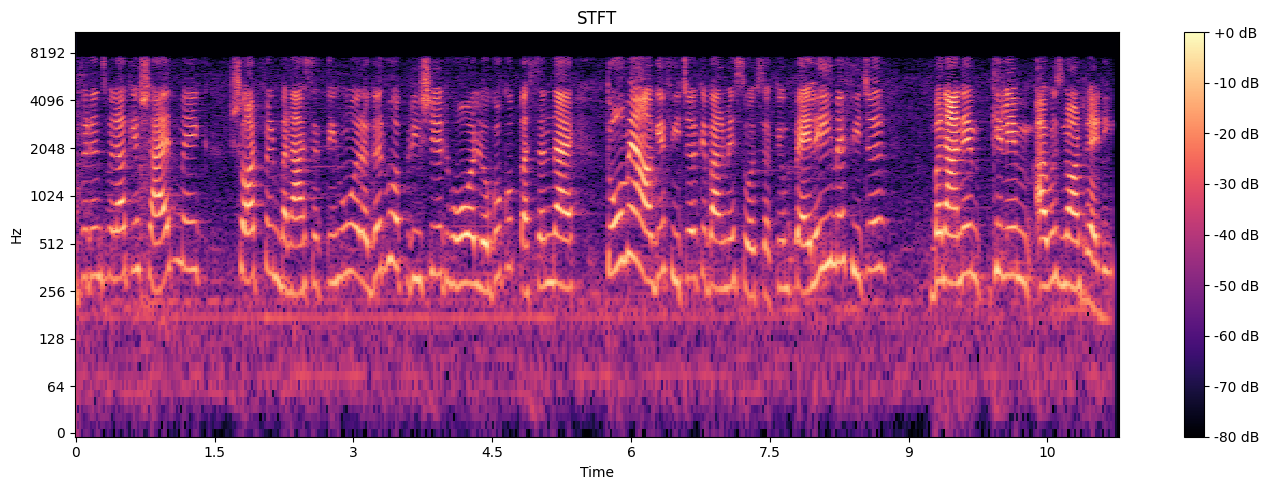

In [137]:
# compute STFT
stft = librosa.stft(y)
stft_magnitude, stft_phase = librosa.magphase(stft)

# display STFT
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(stft_magnitude, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()


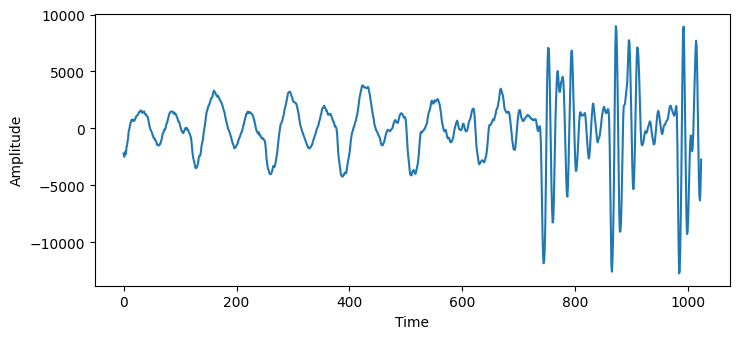

In [138]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
input_data = read("11.wav")
audio = input_data[1]
plt.plot(audio[0:1024])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

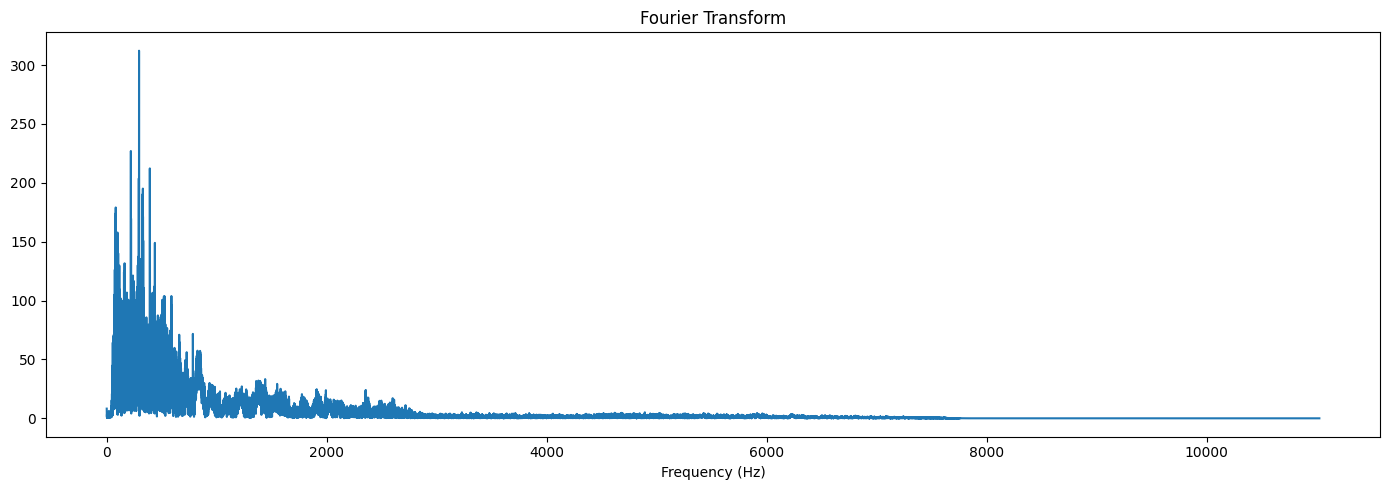

In [139]:
import librosa
import numpy as np

# load the example clip
y, sr = librosa.load('11.wav')

# compute the Fourier Transform and its magnitude
fft = np.fft.fft(y)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))  # create frequency variable

# plot spectrum
plt.figure(figsize=(14, 5))
plt.plot(frequency[:int(len(frequency)/2)], magnitude[:int(len(magnitude)/2)])  # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.title('Fourier Transform')
plt.show()


(-4.4203163e-05-8.4856504e-07j)
1.2997991
(-1.3884688e-09+7.581297e-07j)


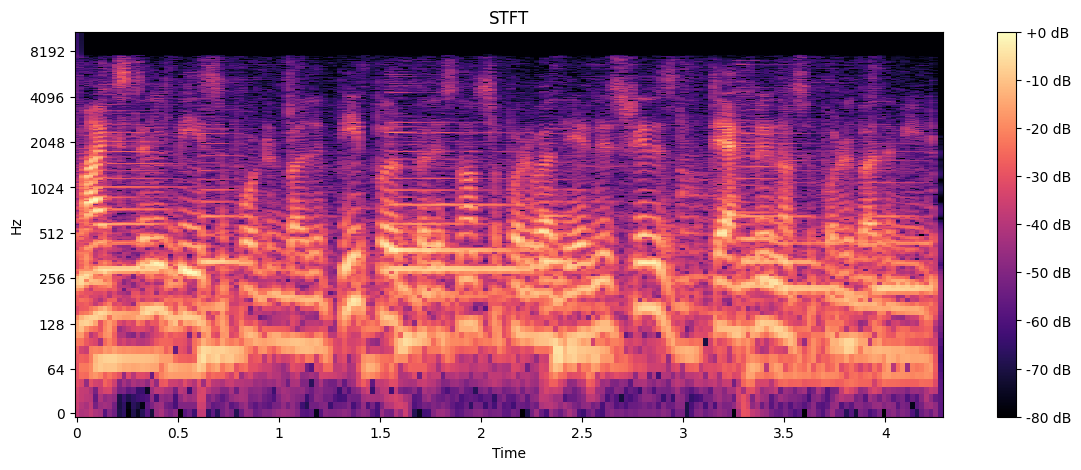

In [15]:
import os
import numpy as np
import pandas as pd
import scipy.stats
import librosa
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
y, sr = librosa.load('11.wav')

stft = librosa.stft(y)
stft_magnitude, stft_phase = librosa.magphase(stft)
meanfreq = np.mean(stft)
print(meanfreq)
sd = np.std(stft)
print(sd)
median = np.median(stft)
print(median)
Q25 = np.quantile(stft, 0.25)
Q50 = np.quantile(stft, 0.50)
Q75 = np.quantile(stft, 0.75)
IQR = scipy.stats.iqr(stft)
skewness = scipy.stats.skew(stft.flatten())
kurtosis = scipy.stats.kurtosis(stft.flatten())
# display STFT
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(stft_magnitude, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()

In [16]:
import os
import numpy as np
import pandas as pd
import scipy.stats
import librosa

directory = r'F:\speech_sri' # Replace with the directory path containing the .wav files
labels = []

    
features = []

for i in range(22):
    filename = f'{i}.wav'
    print(filename)
    
    if filename in os.listdir(directory):  # Ensure the file exists in the directory
        y, sr = librosa.load(os.path.join(directory, filename))
        
        # Perform STFT
       
        stft = librosa.stft(y)

        # Calculate various statistical measures
        meanfreq = np.mean(stft)
        sd = np.std(stft)
        median = np.median(stft)
        Q25 = np.quantile(stft, 0.25)
        Q50 = np.quantile(stft, 0.50)
        Q75 = np.quantile(stft, 0.75)
        IQR = scipy.stats.iqr(stft)
        skewness = scipy.stats.skew(stft.flatten())
        kurtosis = scipy.stats.kurtosis(stft.flatten())

        # Spectral Entropy
        freqs, psd = scipy.signal.welch(y, sr)
        sp_ent = -np.sum(psd*np.log2(psd))

        # Spectral Flatness
        sfm = librosa.feature.spectral_flatness(y=y)[0]

        # Mode (Most frequent element)
        mode = scipy.stats.mode(stft.flatten())[0][0]

        # Spectral Centroid
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

        # Frequency (Spectral) Contrast
        S = np.abs(librosa.stft(y, hop_length=512))
        contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

        # Save feature to the features list
        features.append([meanfreq, sd, median, Q25, Q50, Q75, IQR, skewness, kurtosis, sp_ent, sfm, mode, centroid])

        # Assign labels: first 2312 files are labelled 1, rest are labelled 0
        labels.append(1 if i < 11 else 0)

# Convert features and labels to a pandas DataFrame and save to CSV
features_df = pd.DataFrame(features, columns=['meanfreq', 'sd', 'median', 'Q25', 'Q50', 'Q75', 'IQR', 'skewness', 'kurtosis', 'sp_ent', 'sfm', 'mode', 'centroid'])
labels_df = pd.DataFrame(labels, columns=['label'])
data_df = pd.concat([features_df, labels_df], axis=1)
data_df.to_csv('audio_features3.csv', index=False)


0.wav
1.wav
2.wav
3.wav
4.wav
5.wav
6.wav
7.wav
8.wav
9.wav
10.wav
11.wav
12.wav
13.wav
14.wav
15.wav
16.wav
17.wav
18.wav
19.wav
20.wav
21.wav


In [19]:
import os
import numpy as np
import pandas as pd
import scipy.stats
import librosa
import scipy.signal
import soundfile as sf
from pydub import AudioSegment

directory = r'F:\speech_sri'  # Replace with the directory path containing the .m4a files
labels = []

features = []

for i in range(22):
    filename = f'{i}.m4a'
    print(filename)

    if filename in os.listdir(directory):  # Ensure the file exists in the directory
        # Convert m4a file to wav
        audio = AudioSegment.from_file(os.path.join(directory, filename))
        audio.export("temp.wav", format="wav")
        y, sr = sf.read("temp.wav")

        # Perform STFT
        stft = librosa.stft(y)

        # Calculate various statistical measures
        meanfreq = np.mean(np.abs(stft))
        sd = np.std(np.abs(stft))
        median = np.median(np.abs(stft))
        Q25 = np.quantile(np.abs(stft), 0.25)
        Q50 = np.quantile(np.abs(stft), 0.50)
        Q75 = np.quantile(np.abs(stft), 0.75)
        IQR = scipy.stats.iqr(np.abs(stft))
        skewness = scipy.stats.skew(np.abs(stft).flatten())
        kurtosis = scipy.stats.kurtosis(np.abs(stft).flatten())

        # Spectral Entropy
        freqs, psd = scipy.signal.welch(y, sr)
        sp_ent = -np.sum(psd * np.log2(psd))

        # Spectral Flatness
        sfm = librosa.feature.spectral_flatness(y=y)[0]

        # Mode (Most frequent element)
        mode = scipy.stats.mode(np.abs(stft).flatten())[0][0]

        # Spectral Centroid
        centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))


        # Frequency (Spectral) Contrast
        S = np.abs(librosa.stft(y, hop_length=512))
        contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

        # Save feature to the features list
        features.append([meanfreq, sd, median, Q25, Q50, Q75, IQR, skewness, kurtosis, sp_ent, sfm, mode, centroid])

        # Assign labels: first 2312 files are labelled 1, rest are labelled 0
        labels.append(1 if i < 11 else 0)

# Convert features and labels to a pandas DataFrame and save to CSV
features_df = pd.DataFrame(features, columns=['meanfreq', 'sd', 'median', 'Q25', 'Q50', 'Q75', 'IQR', 'skewness', 'kurtosis', 'sp_ent', 'sfm', 'mode', 'centroid'])
labels_df = pd.DataFrame(labels, columns=['label'])
data_df = pd.concat([features_df, labels_df], axis=1)
data_df.to_csv('audio_features4.csv', index=False)


0.m4a


C:\Users\Dell\AppData\Local\Temp\ipykernel_14820\2435945894.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = scipy.stats.mode(np.abs(stft).flatten())[0][0]


1.m4a
2.m4a
3.m4a
4.m4a
5.m4a
6.m4a
7.m4a
8.m4a
9.m4a
10.m4a
11.m4a
12.m4a
13.m4a
14.m4a
15.m4a
16.m4a
17.m4a
18.m4a
19.m4a
20.m4a
21.m4a
